In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv("fandango_score_comparison.csv")

fandango_stars = movies['Fandango_Stars']
metacritic_nr = movies['Metacritic_norm_round']

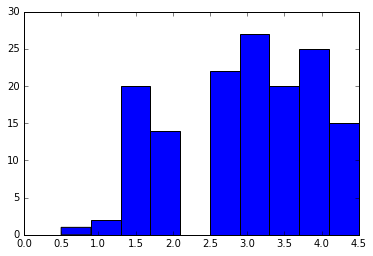

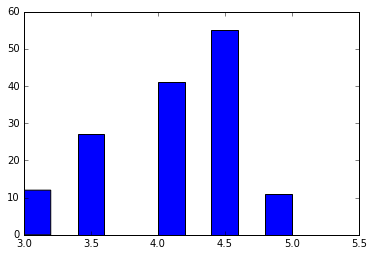

In [5]:
plt.hist(metacritic_nr)
plt.show()

plt.hist(fandango_stars)
plt.show()

# Metacritic vs. Fandango Histogram

The most noticeable difference between the two histograms is that the Fandango histogram (the 2nd one) does not have a score less than 3.0! That seems in itself somewhat fishy. It's also apparent that the Metacritic reviews are more focused around the 2.5-4.0 mark, while the Fandango reviews are primarly in the 4.0-4.5 range.


In [10]:
fandango_stars_mean = fandango_stars.mean()
metacritic_nr_mean = metacritic_nr.mean()

In [11]:
fandango_stars_std = fandango_stars.std()
metacritic_nr_std = metacritic_nr.std()

In [14]:
fandango_stars_med = fandango_stars.median()
metacritic_nr_med = metacritic_nr.median()

In [15]:
print("Fandango Mean: ", fandango_stars_mean)
print("Metacritic Mean: ", metacritic_nr_mean)

print("Fandango Median: ", fandango_stars_med)
print("Metacritic Median: ", metacritic_nr_med)

print("Fandango Standard Deviation: ", fandango_stars_std)
print("Metacritic Standard Deviation: ", metacritic_nr_std)


Fandango Mean:  4.08904109589
Metacritic Mean:  2.97260273973
Fandango Median:  4.0
Metacritic Median:  3.0
Fandango Standard Deviation:  0.540385977979
Metacritic Standard Deviation:  0.990960561374


# Metacritic vs. Fandango Mean and Std Dev

Mean:
- The Fandango mean is greatly higher than the Metacritic mean, in fact over a full point on the 5-point scale. This potentially shows some bias towards higher ratings on the Fandango website than on Metacritic.

Median:
- The Fandango median is lower than its mean, likely due to the fact that there aren't many large values in the data (less values that are far away from the mean). 
- The Metacritic median is higher than its mean, which would infer that there are some larger values in the data (more values further from the mean value in the dataset).

Standard Deviation:
- The Fandango standard deviation is lower than the Metacritic standard deviation, which would imply that the rating values in the Fandango dataset do not deviate much from the mean, whereas there is a greater variation of values in the Metacritic dataset.

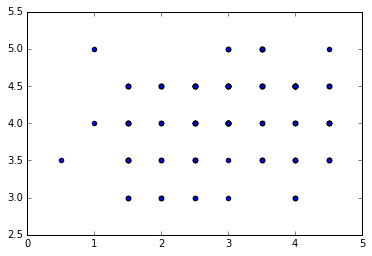

In [21]:
plt.scatter(metacritic_nr, fandango_stars)
plt.show()

In [23]:
movies['fm_diff'] = (metacritic_nr - fandango_stars).abs()

movies.sort_values('fm_diff', inplace=True, ascending=False)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [29]:
import scipy.stats

rval, pval = scipy.stats.pearsonr(fandango_stars, metacritic_nr)
print(rval)

0.178449190739


# Correlation Coefficient, Fandango and Metacritic
We can see that the r-value between Fandango and Metacritic is fairly low, meaning that there likely is no real correlation between Fandango ratings and Metacritic ratings.

In [31]:
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(metacritic_nr, fandango_stars)

In [32]:
pred_3 = 3 * slope + intercept

In [33]:
pred_3

4.0917071528212041

# Predicting Fandango reviews based on Metacritic Scores
In the above example, we predict that a movie reviewed as a 3.0 in Metacritic would be rated as a 4.0 in Fandango.

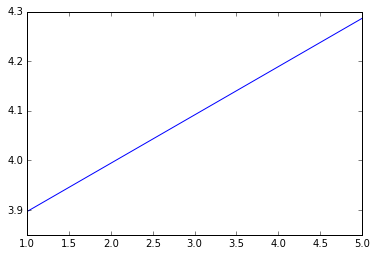

In [35]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept

plt.scatter(metac)
plt.plot([1.0,5.0], [pred_1,pred_5])
plt.xlim(1,5)
plt.show()